In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install plotly statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
data = pd.read_csv(r"E:\Jupyter Notebook\Walmart Project\Walmart_Sales.csv")
data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [11]:
df = data.copy()

In [13]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [17]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [21]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayofWeek'] = df['Date'].dt.dayofweek

In [23]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  DayofWeek  
0  211.096358         8.106  2010      2          4  
1  211.242170         8.106  2010      2          4  
2  211.289143         8.106  2010      2          4  
3  211.319643         8.106  2010      2          4  
4  211.350143         8.106  2010      3          4

In [25]:
df.duplicated().sum()

0

Q#1  What are te total and average weekly sales?


In [27]:
total_sales = df['Weekly_Sales'].sum()
average_sales = df['Weekly_Sales'].mean()

print(f"Total Weekly Sales: ${total_sales:,.2f}")
print(f"Average Weekly Sales: ${average_sales:,.2f}")


store_sales = df.groupby('Store')['Weekly_Sales'].agg(['sum', 'mean']).reset_index()
store_sales.columns = ['Store', 'Total_Weekly_Sales', 'Average_Weekly_Sales']
store_sales.sort_values(by='Total_Weekly_Sales', ascending=False, inplace=True)
store_sales.head()

Total Weekly Sales: $6,737,218,987.11
Average Weekly Sales: $1,046,964.88


Store  Total_Weekly_Sales  Average_Weekly_Sales
19     20        3.013978e+08          2.107677e+06
3       4        2.995440e+08          2.094713e+06
13     14        2.889999e+08          2.020978e+06
12     13        2.865177e+08          2.003620e+06
1       2        2.753824e+08          1.925751e+06

AttributeError: Text.set() got an unexpected keyword argument 'rotatoion'

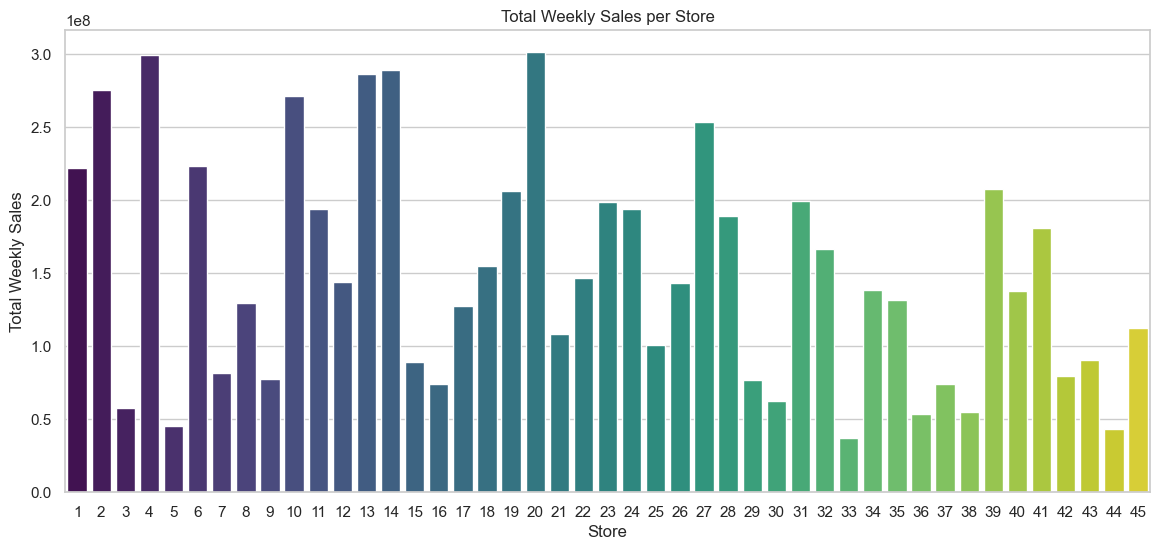

In [29]:
plt.figure(figsize=(14,6))
sns.barplot(x="Store", y="Total_Weekly_Sales", data=store_sales,palette='viridis')
plt.title("Total Weekly Sales per Store")
plt.ylabel("Total Weekly Sales")
plt.xlabel("Store")
plt.xticks(rotatoion=90)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




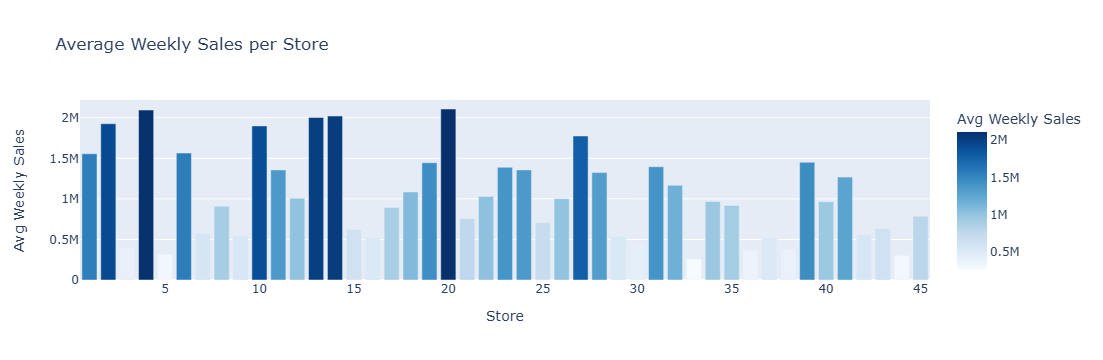

In [31]:
import plotly.express as px

fig = px.bar(store_sales, x='Store', y='Average_Weekly_Sales',
             title='Average Weekly Sales per Store',
             labels={'Average_Weekly_Sales': 'Avg Weekly Sales'},
             color='Average_Weekly_Sales',
             color_continuous_scale='Blues')
fig.show()

Question 2: Time-Based Analysis?
What is the trend of total weekly sales over time?
What are the average monthly sales?

In [33]:
df["Date"] = pd.to_datetime(df["Date"])

In [35]:
weekly_sales_trend = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales_trend.head()

Date  Weekly_Sales
0 2010-02-05   49750740.50
1 2010-02-12   48336677.63
2 2010-02-19   48276993.78
3 2010-02-26   43968571.13
4 2010-03-05   46871470.30

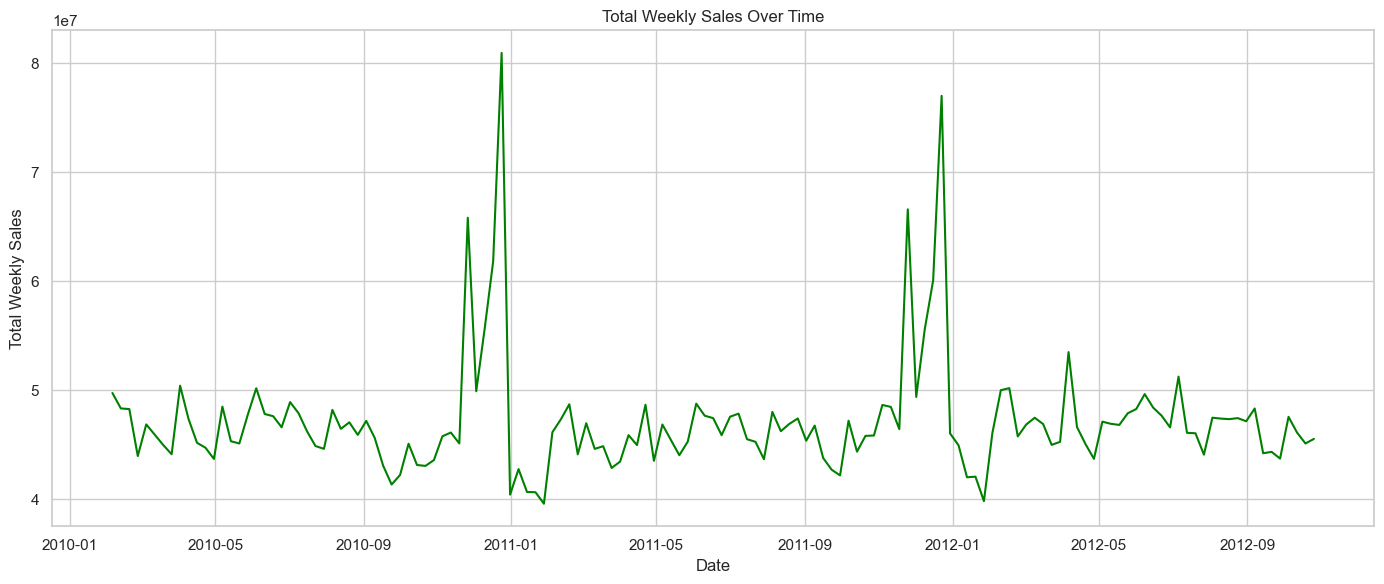

In [37]:
# Weekly Sales Over Time (Line Chart with Matplotlib)
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales_trend['Date'], weekly_sales_trend['Weekly_Sales'], color='green')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



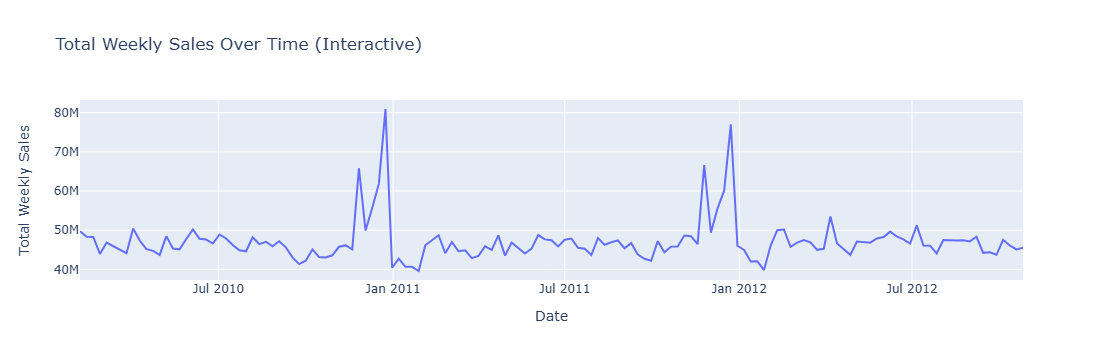

In [39]:
# Weekly Sales Over Time (Interactive Plot with Plotly)
import plotly.express as px

fig = px.line(weekly_sales_trend, x='Date', y='Weekly_Sales',
              title='Total Weekly Sales Over Time (Interactive)',
              labels={'Weekly_Sales': 'Total Weekly Sales'})
fig.show()

In [41]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales.head()

Month  Weekly_Sales
0  2010-02  1.057405e+06
1  2010-03  1.010666e+06
2  2010-04  1.028499e+06
3  2010-05  1.037283e+06
4  2010-06  1.068034e+06

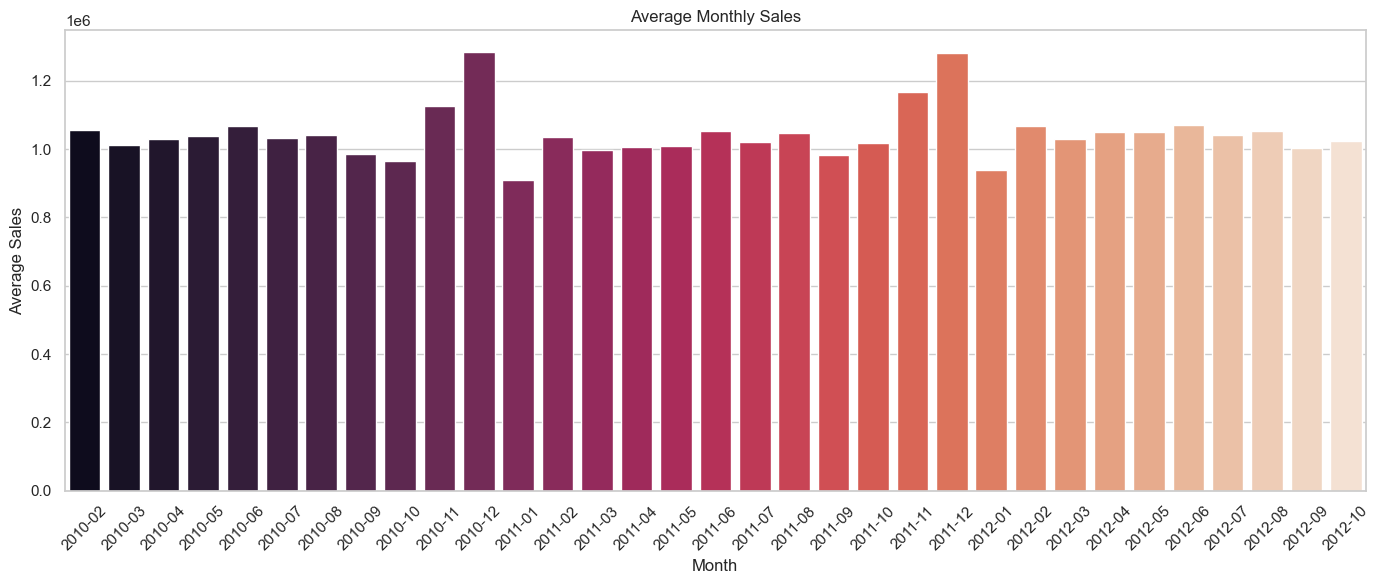

In [43]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Month', y='Weekly_Sales', data=monthly_sales, palette='rocket')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 3: Store-Level Insights
❓ Which stores perform best and worst in terms of average weekly sales?

In [45]:
 # Calculate average weekly sales per store
store_avg_sales = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
store_avg_sales = store_avg_sales.sort_values(by='Weekly_Sales', ascending=False)
store_avg_sales.head()

Store  Weekly_Sales
19     20  2.107677e+06
3       4  2.094713e+06
13     14  2.020978e+06
12     13  2.003620e+06
1       2  1.925751e+06

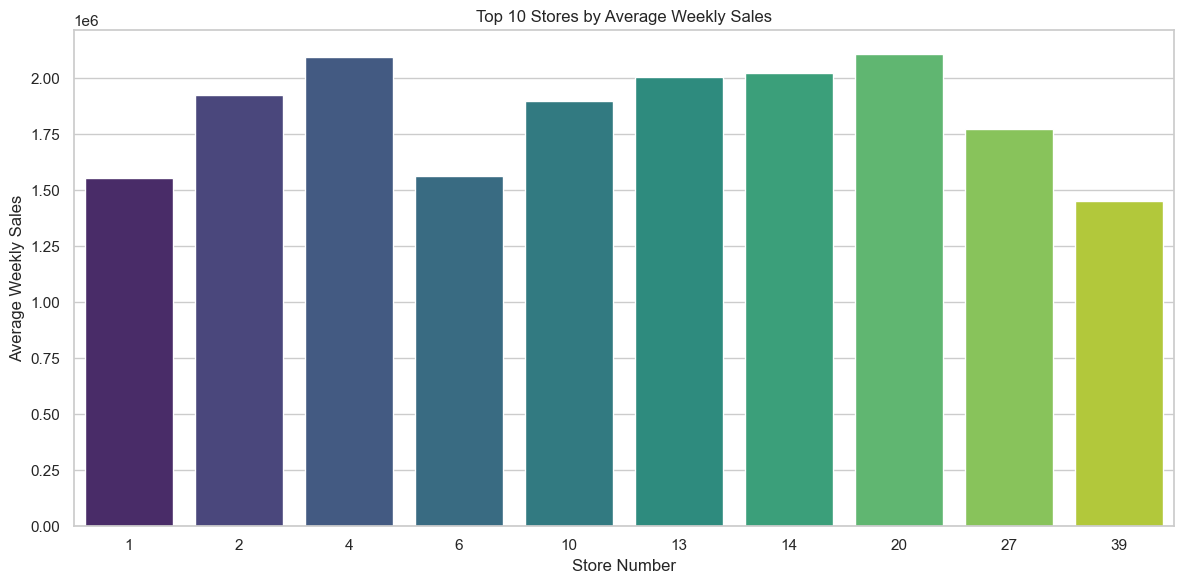

In [47]:
top_10_stores = store_avg_sales.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_10_stores, palette='viridis')
plt.title('Top 10 Stores by Average Weekly Sales')
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

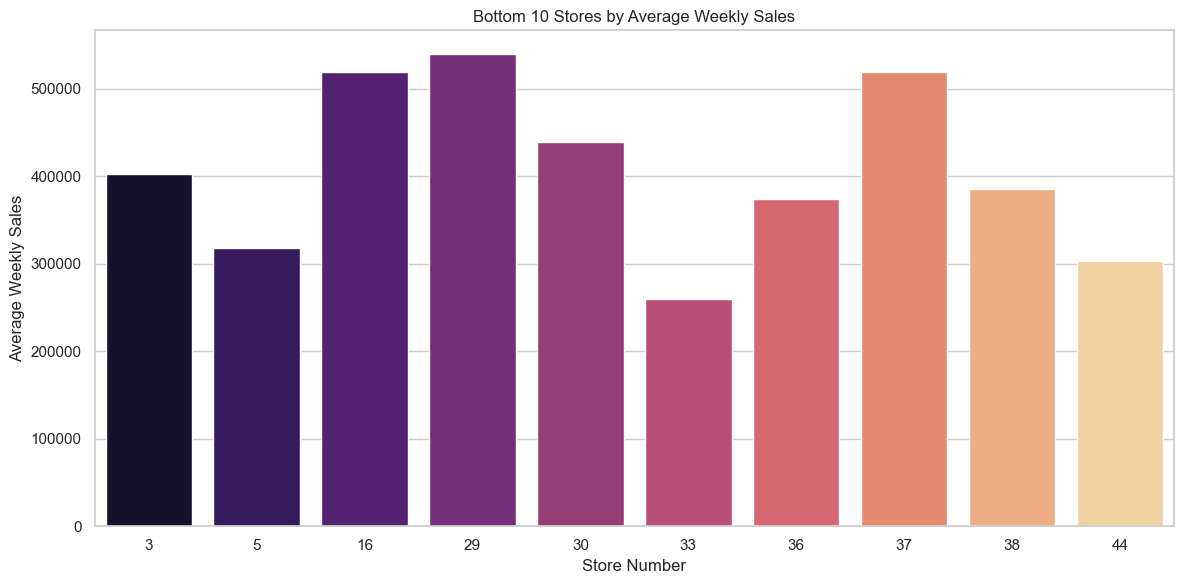

In [49]:
bottom_10_stores = store_avg_sales.tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=bottom_10_stores, palette='magma')
plt.title('Bottom 10 Stores by Average Weekly Sales')
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

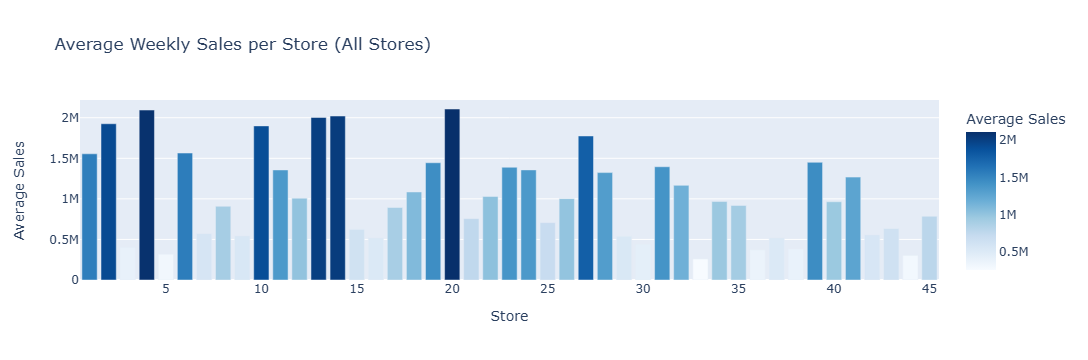

In [51]:
import plotly.express as px

fig = px.bar(store_avg_sales, x='Store', y='Weekly_Sales',
             title='Average Weekly Sales per Store (All Stores)',
             labels={'Weekly_Sales': 'Average Sales'},
             color='Weekly_Sales', color_continuous_scale='Blues')
fig.show()

Question 4: Holiday Impact,
Do holiday weeks increase or decrease sales?
We’ll compare average sales during holiday weeks vs. non-holiday weeks?

In [53]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
holiday_sales['Holiday_Flag'] = holiday_sales['Holiday_Flag'].map({0: 'Non-Holiday', 1: 'Holiday'})
holiday_sales

Holiday_Flag  Weekly_Sales
0  Non-Holiday  1.041256e+06
1      Holiday  1.122888e+06

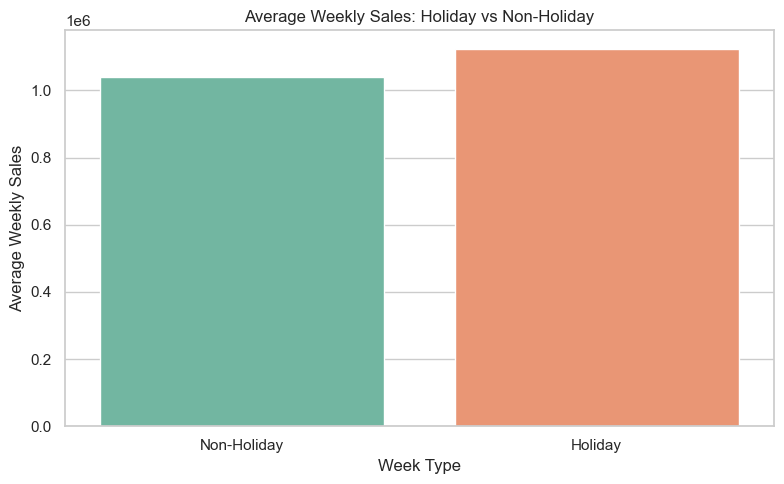

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=holiday_sales, palette='Set2')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Week Type')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

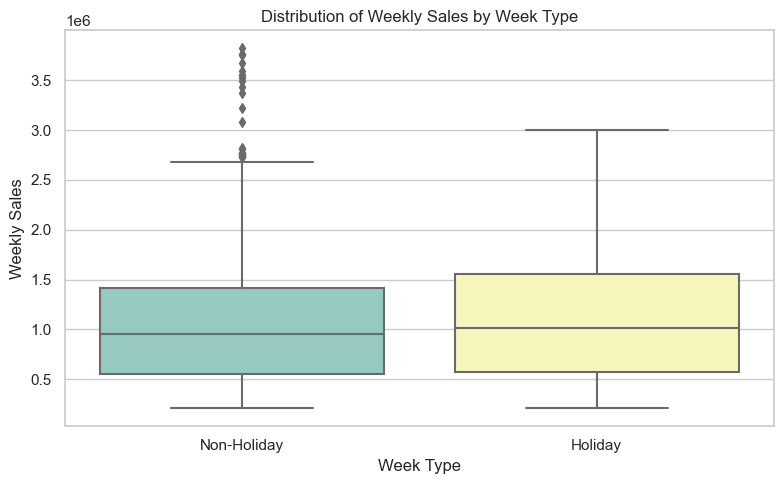

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df.replace({'Holiday_Flag': {0: 'Non-Holiday', 1: 'Holiday'}}), palette='Set3')
plt.title('Distribution of Weekly Sales by Week Type')
plt.xlabel('Week Type')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

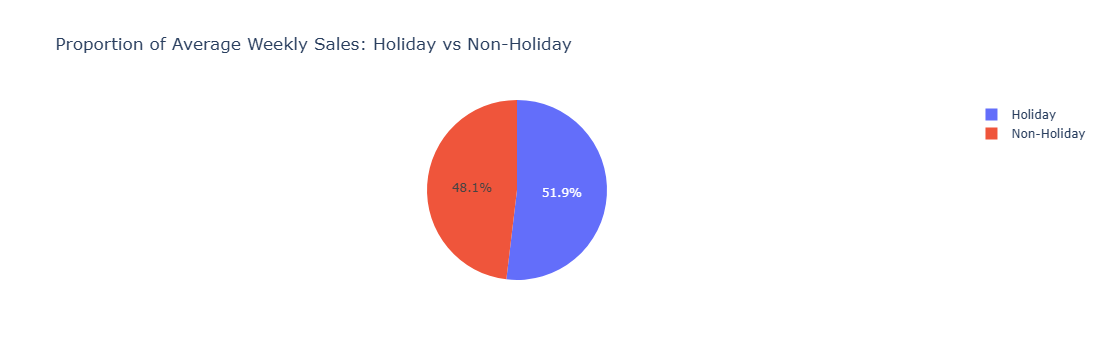

In [59]:
import plotly.express as px

fig = px.pie(holiday_sales, names='Holiday_Flag', values='Weekly_Sales',
             title='Proportion of Average Weekly Sales: Holiday vs Non-Holiday')
fig.show()

✅ Question 5: Economic Impact
❓ Is there a correlation between CPI, Fuel Price, and Unemployment with sales?
We'll explore how these economic indicators relate to Weekly_Sales using:

Correlation matrix

Regression plots

Interactive scatter plots (Plotly)

In [61]:
economic_data = df[['Weekly_Sales', 'CPI', 'Fuel_Price', 'Unemployment']]
economic_data.head()

Weekly_Sales         CPI  Fuel_Price  Unemployment
0    1643690.90  211.096358       2.572         8.106
1    1641957.44  211.242170       2.548         8.106
2    1611968.17  211.289143       2.514         8.106
3    1409727.59  211.319643       2.561         8.106
4    1554806.68  211.350143       2.625         8.106

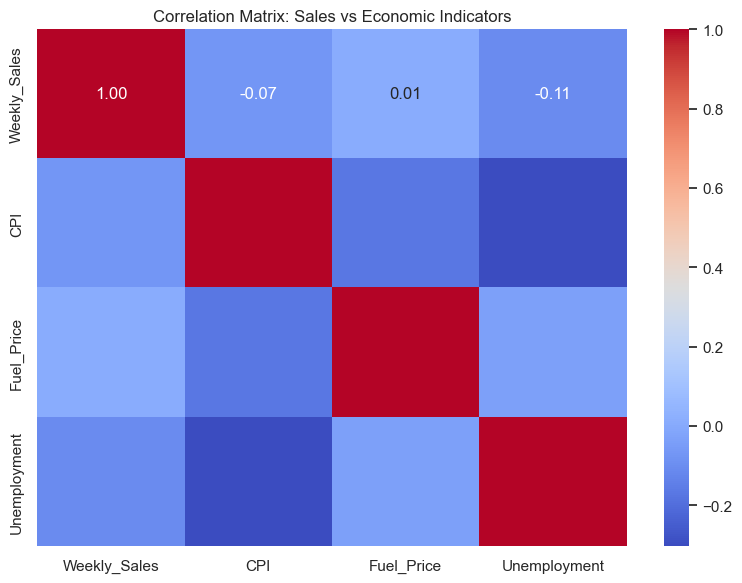

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(economic_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Sales vs Economic Indicators')
plt.tight_layout()
plt.show()

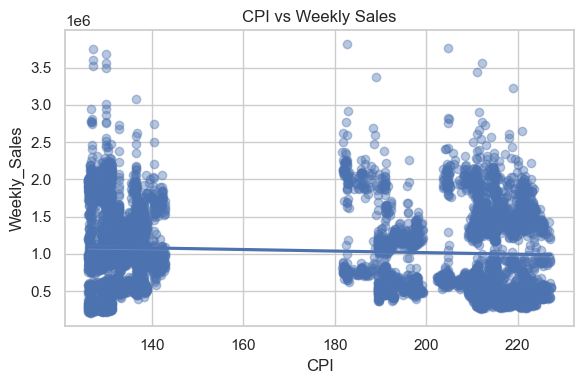

In [65]:
plt.figure(figsize=(6, 4))
sns.regplot(x='CPI', y='Weekly_Sales', data=df, scatter_kws={'alpha':0.4})
plt.title('CPI vs Weekly Sales')
plt.tight_layout()
plt.show()

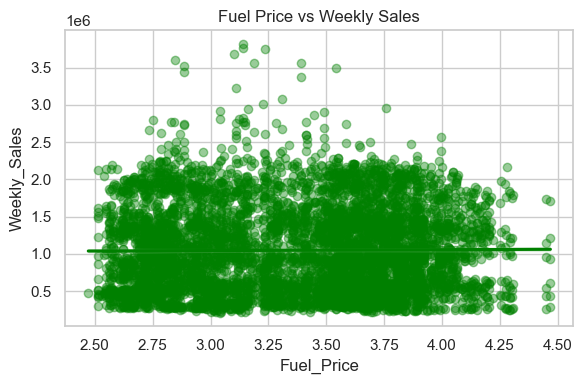

In [67]:
plt.figure(figsize=(6, 4))
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=df, scatter_kws={'alpha':0.4}, color='green')
plt.title('Fuel Price vs Weekly Sales')
plt.tight_layout()
plt.show()

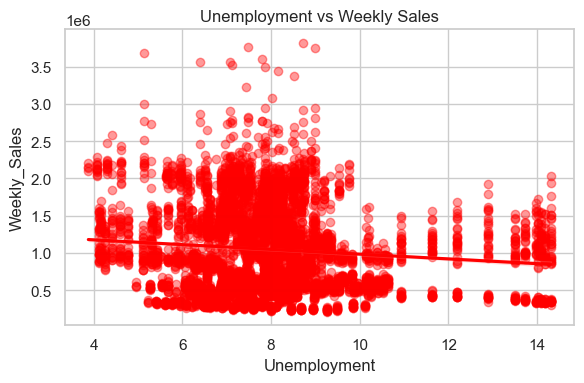

In [69]:
plt.figure(figsize=(6, 4))
sns.regplot(x='Unemployment', y='Weekly_Sales', data=df, scatter_kws={'alpha':0.4}, color='red')
plt.title('Unemployment vs Weekly Sales')
plt.tight_layout()
plt.show()

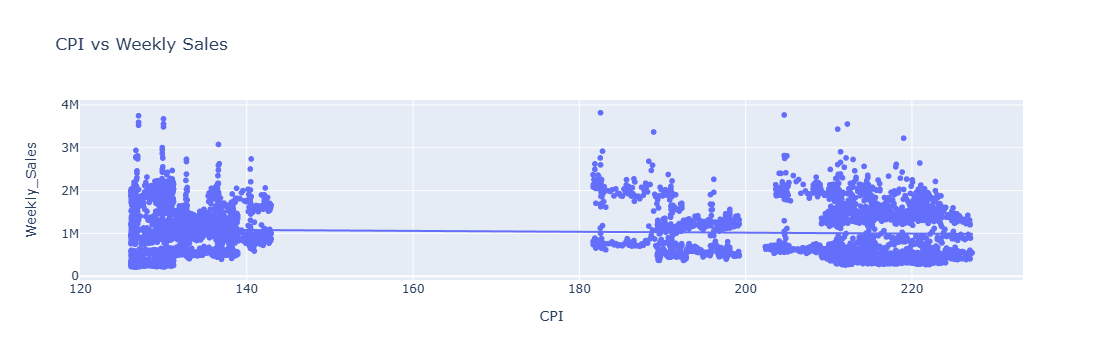

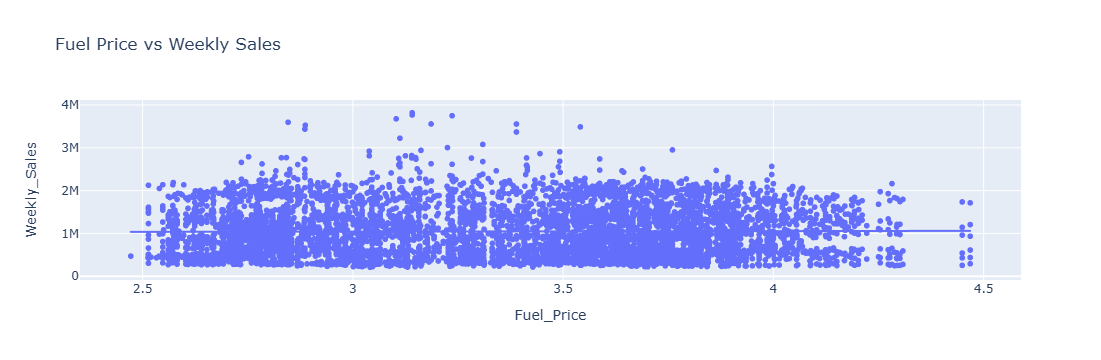

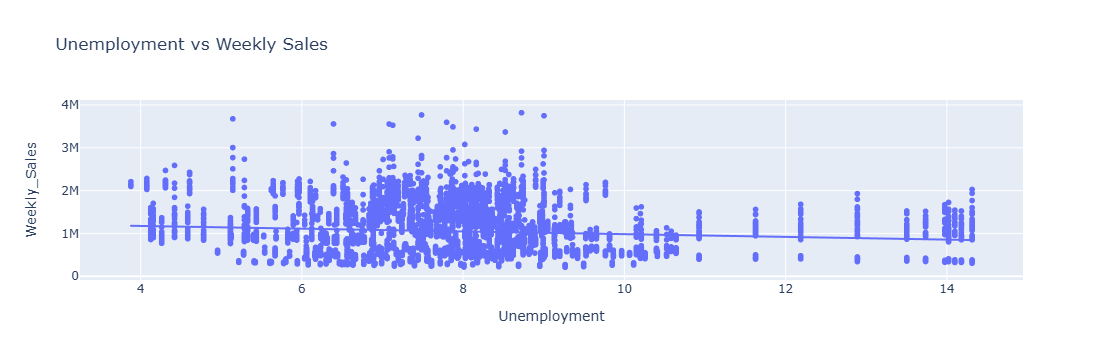

In [71]:
import plotly.express as px

fig1 = px.scatter(df, x='CPI', y='Weekly_Sales', title='CPI vs Weekly Sales', trendline='ols')
fig1.show()

fig2 = px.scatter(df, x='Fuel_Price', y='Weekly_Sales', title='Fuel Price vs Weekly Sales', trendline='ols')
fig2.show()

fig3 = px.scatter(df, x='Unemployment', y='Weekly_Sales', title='Unemployment vs Weekly Sales', trendline='ols')
fig3.show()

✅ Question 6: Can we forecast future sales using ARIMA?
We'll use ARIMA (AutoRegressive Integrated Moving Average) to forecast future weekly sales?

In [73]:
df['Date'] = pd.to_datetime(df['Date'])
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().sort_index()
weekly_sales.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

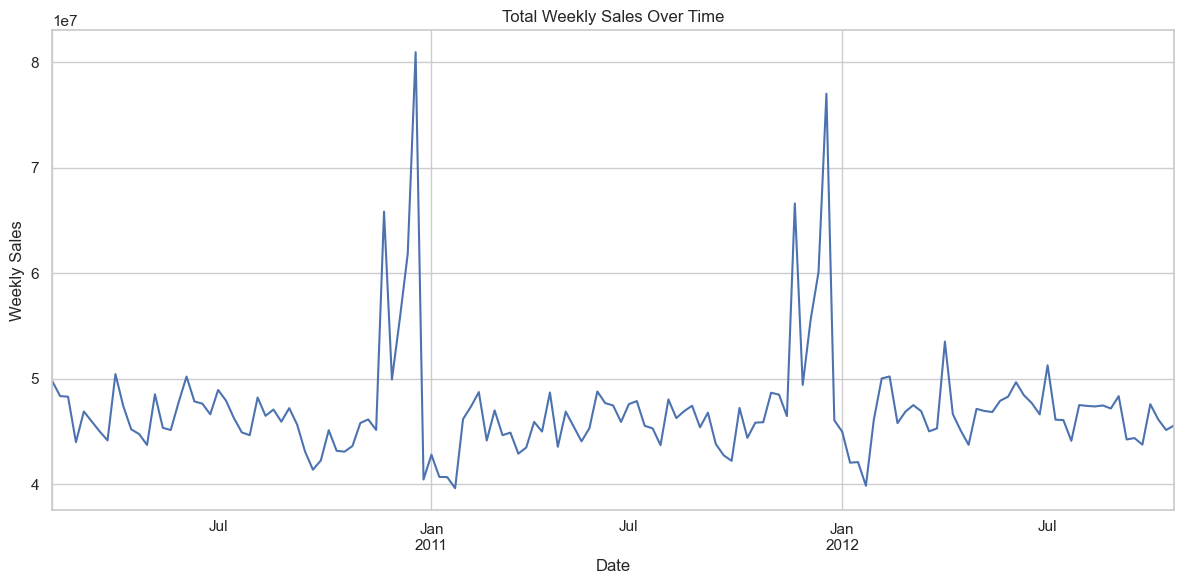

In [75]:
plt.figure(figsize=(12, 6))
weekly_sales.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(weekly_sales)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -5.908297957186333
p-value: 2.675979158986027e-07


In [79]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(weekly_sales, order=(1,1,1))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2407.205
Date:                Mon, 21 Jul 2025   AIC                           4820.410
Time:                        17:13:58   BIC                           4829.277
Sample:                    02-05-2010   HQIC                          4824.013
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4556      0.065      6.965      0.000       0.327       0.584
ma.L1         -0.9767      0.038    -25.432      0.000      -1.052      -0.901
sigma2      3.067e+13   7.95e-16   3.86e+28      0.0

In [81]:
forecast = model_fit.forecast(steps=12)  # Forecast next 12 weeks
forecast

2012-11-02    4.631238e+07
2012-11-09    4.666243e+07
2012-11-16    4.682193e+07
2012-11-23    4.689460e+07
2012-11-30    4.692771e+07
2012-12-07    4.694279e+07
2012-12-14    4.694967e+07
2012-12-21    4.695280e+07
2012-12-28    4.695423e+07
2013-01-04    4.695488e+07
2013-01-11    4.695517e+07
2013-01-18    4.695531e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64

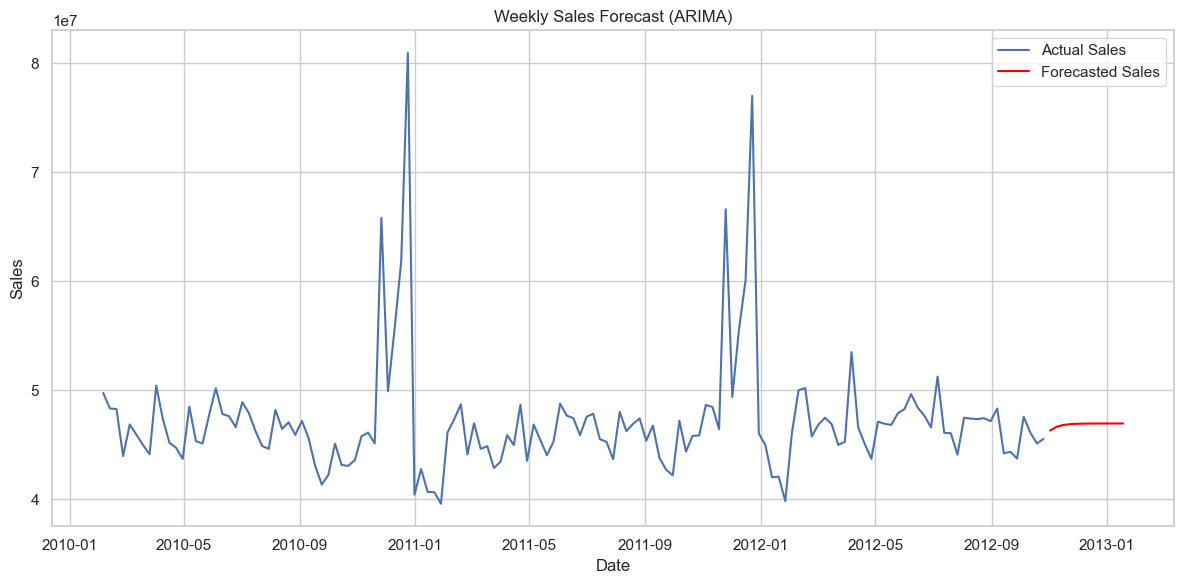

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Actual Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title('Weekly Sales Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [85]:
from pmdarima import auto_arima

stepwise_model = auto_arima(weekly_sales, seasonal=False, trace=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4855.994, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5462.768, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5370.491, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4853.809, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5343.635, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4830.601, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4834.617, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4829.490, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4844.691, Time=0.05 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2410.710
Date:                Mon, 21 Jul 2025   AIC                           4829.420
Time:                        17:14:15   BIC                           4841.271
Sample:                    02-05-2010   HQIC                          4834.235
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.741e+07   9.41e-10   2.91e+16      0.000    2.74e+07    2.74e+07
ar.L1          0.2968      0.048      6.147      0.000       0.202       0.391
ar.L2          0.1214      0.052      2.323      0.020       0.019       0.224
sigma2      2.601e+13   9.32e-16   2.79e+28      0.000     2.6e+13     2.6e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1162.94
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             2.56
Prob(H) (two-sided):                  0.11   Kurtosis:                        16.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.34e+43. Standard errors may be unstable.
"""

In [87]:
# Re-run forecast to get next 12 weeks
forecast = model_fit.forecast(steps=12)

# Create DataFrame
forecast_df = pd.DataFrame({
    'Forecast_Date': forecast.index,
    'Forecasted_Weekly_Sales': forecast.values
})

# Save to CSV
forecast_df.to_csv('weekly_sales_forecast.csv', index=False)

print("✅ Forecast exported as 'weekly_sales_forecast.csv'")

✅ Forecast exported as 'weekly_sales_forecast.csv'


In [89]:
import IPython
from IPython.display import FileLink

# Create a clickable download link
FileLink('weekly_sales_forecast.csv')

E:\Jupyter Notebook\Walmart Project\weekly_sales_forecast.csv

In [95]:
plt.savefig(r"E:\Jupyter Notebook\Walmart Project\weekly_sales_plot.png")

<Figure size 640x480 with 0 Axes>

In [99]:
import os
os.makedirs("Walmart_Project_Outputs", exist_ok=True)

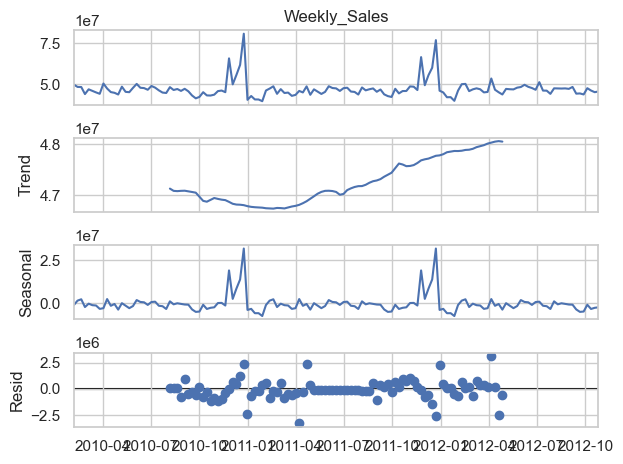

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(weekly_sales, model='additive', period=52)
decomposition.plot()
plt.savefig("Walmart_Project_Outputs/q2_decomposition.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x500 with 0 Axes>

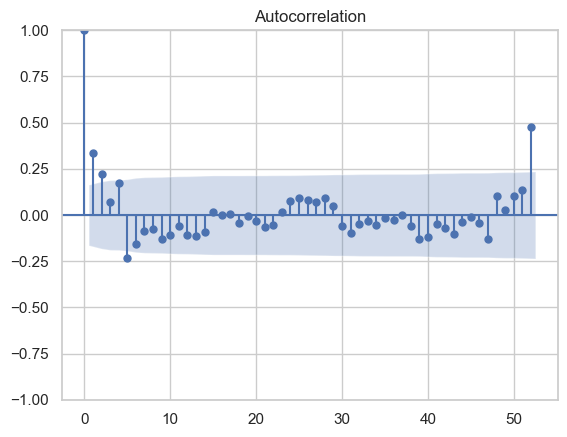

<Figure size 1200x500 with 0 Axes>

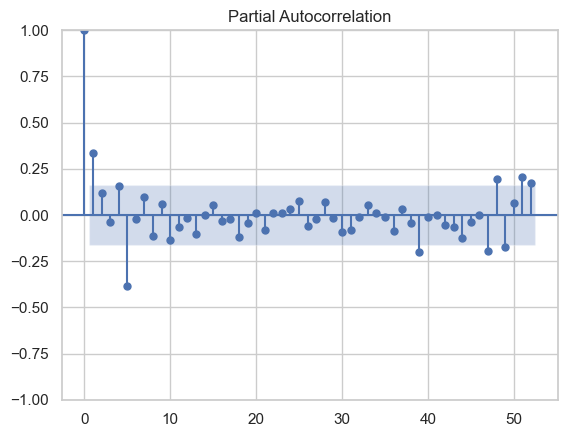

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plot_acf(weekly_sales, lags=52)
plt.savefig("Walmart_Project_Outputs/q3_acf.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(weekly_sales, lags=52)
plt.savefig("Walmart_Project_Outputs/q3_pacf.png", dpi=300, bbox_inches='tight')
plt.show()


In [107]:
# This is only text output
from pmdarima import auto_arima
stepwise_model = auto_arima(weekly_sales, seasonal=False, trace=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4855.994, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5462.768, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5370.491, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4853.809, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5343.635, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4830.601, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4834.617, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4829.490, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4844.691, Time=0.06 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2410.710
Date:                Mon, 21 Jul 2025   AIC                           4829.420
Time:                        17:15:47   BIC                           4841.271
Sample:                    02-05-2010   HQIC                          4834.235
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.741e+07   9.41e-10   2.91e+16      0.000    2.74e+07    2.74e+07
ar.L1          0.2968      0.048      6.147      0.000       0.202       0.391
ar.L2          0.1214      0.052      2.323      0.020       0.019       0.224
sigma2      2.601e+13   9.32e-16   2.79e+28      0.000     2.6e+13     2.6e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1162.94
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             2.56
Prob(H) (two-sided):                  0.11   Kurtosis:                        16.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.34e+43. Standard errors may be unstable.
"""

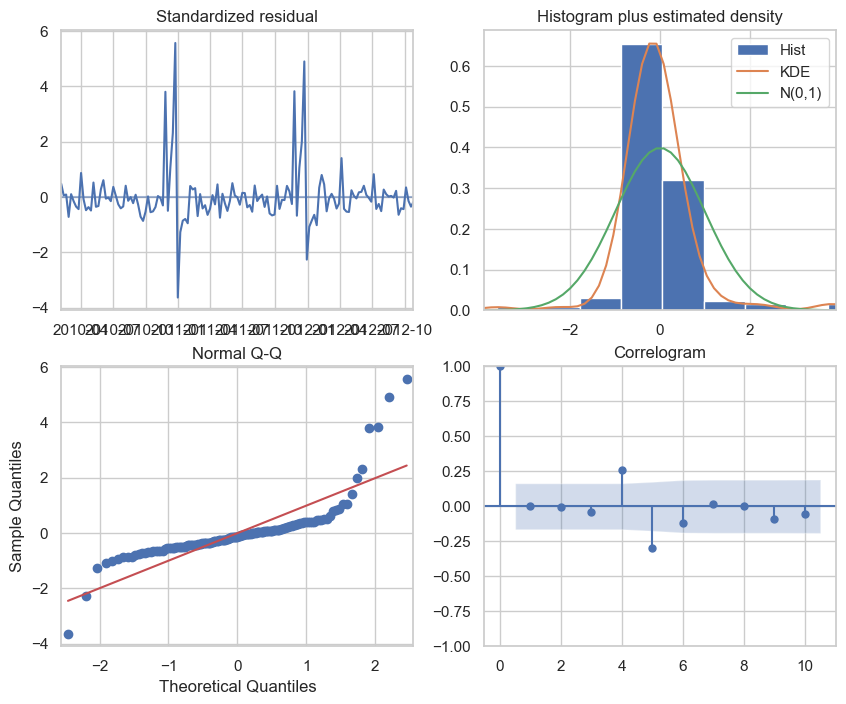

In [109]:
stepwise_model.plot_diagnostics(figsize=(10, 8))
plt.savefig("Walmart_Project_Outputs/q4_auto_arima_diagnostics.png", dpi=300, bbox_inches='tight')
plt.show()


In [118]:
weekly_sales.describe()

count    1.430000e+02
mean     4.711342e+07
std      5.444206e+06
min      3.959985e+07
25%      4.488059e+07
50%      4.624390e+07
75%      4.779202e+07
max      8.093142e+07
Name: Weekly_Sales, dtype: float64

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(weekly_sales, model='additive')

In [122]:
from pmdarima import auto_arima
model = auto_arima(weekly_sales, seasonal=True, m=52, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=4769.760, Time=5.78 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.691, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.381, Time=0.95 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.927, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.768, Time=0.07 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=5.17 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=4767.813, Time=3.66 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=4830.548, Time=0.49 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=4769.801, Time=24.82 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=4773.250, Time=38.65 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=4777.852, Time=3.14 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.475, Time=4.60 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=4769.157, Time=6.68 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=4779.845, Time=4.24 sec
 ARIMA(1,0,1)(1,0,0)[5

In [126]:
model.summary()  # Get detailed summary

forecast = model.predict(n_periods=12)  # Forecast next 12 weeks

# Save forecast to DataFrame
forecast_df = pd.DataFrame({
    'Forecast_Week': pd.date_range(start=weekly_sales.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W'),
    'Forecasted_Sales': forecast
})

forecast_df.to_csv("weekly_sales_forecast.csv", index=False)


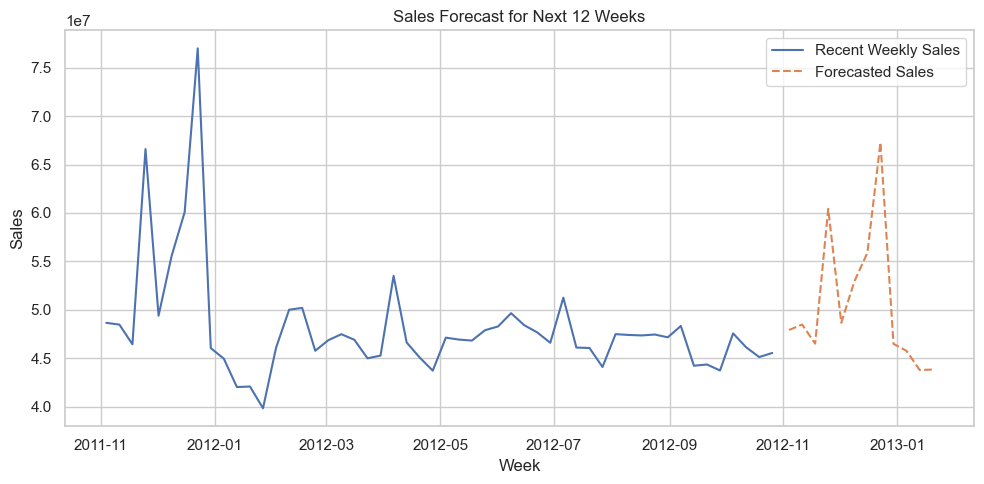

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(weekly_sales[-52:], label="Recent Weekly Sales")
plt.plot(forecast_df['Forecast_Week'], forecast_df['Forecasted_Sales'], label="Forecasted Sales", linestyle='--')
plt.title("Sales Forecast for Next 12 Weeks")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.savefig("forecast_next_12_weeks.png")
plt.show()